# 2. Exploratory Data Analysis (EDA)

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('loan_data_2007_2014.csv', index_col = 0)
df.sample(3, random_state = 42)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
362514,19677589,21900299,32500,32500,32500.0,60 months,14.99,773.01,C,C5,Licensed vocational nurse,< 1 year,MORTGAGE,65000.0,Verified,Jul-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,950xx,CA,9.32,0.0,Apr-02,0.0,NaN,NaN,7.0,0.0,1208,4.3,20.0,f,0.00,0.00,38213.56,38213.56,32500.00,5713.56,0.0,0.0,0.0,Oct-15,27391.42,NaN,Oct-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,6563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25100.0,NaN,NaN,NaN
288564,29755527,32278795,11000,11000,11000.0,60 months,20.99,297.53,E,E4,shift manager,10+ years,MORTGAGE,60000.0,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,472xx,IN,24.19,1.0,Aug-03,0.0,3.0,NaN,18.0,0.0,13129,54.7,43.0,w,9214.67,9214.67,4450.12,4450.12,1785.33,2664.79,0.0,0.0,0.0,Jan-16,297.53,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,107972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24000.0,NaN,NaN,NaN
213591,1343334,1588314,30000,30000,30000.0,36 months,14.65,1034.83,C,C2,FastMed urgent care,1 year,MORTGAGE,175000.0,Verified,Jun-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 06/06/12 > I am seeking a ...,debt_consolidation,Debt Consolidation,852xx,AZ,13.34,0.0,Mar-02,0.0,41.0,NaN,9.0,0.0,1906,22.4,38.0,f,0.00,0.00,32388.64,32388.64,30000.00,2388.64,0.0,0.0,0.0,Jan-13,26181.92,NaN,Mar-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list_item = []
for col in df.columns :
    list_item.append([col, df[col].dtype, df[col].count(), df[col].isna().sum(),
                      100 * df[col].isna().sum() / len(df[col]),
                      df[col].min() if df[col].dtype in ['int64', 'float64'] else '-',
                      df[col].max() if df[col].dtype in ['int64', 'float64'] else '-',
                      df[col].nunique(), df[col].unique()])
desc_df = pd.DataFrame(data = list_item, columns = ['feature', 'data_type', 'fill_num', 'null_num', 'null_percent', 'min_value', 'max_value', 'unique_num', 'unique_sample'])

In [7]:
# Menghapus kolom yang hanya memiliki nilai unique 0 atau 1
df_drop = desc_df[desc_df.unique_num <= 1].feature.tolist()
for col in df_drop :
    df = df.drop(col, axis = 1)

df_nums = df.select_dtypes(include = ['int64', 'float64'])
df_cats = df.select_dtypes(include = 'object')
nums = df_nums.columns.tolist()
cats = df_cats.columns.tolist()

In [8]:
list_item = []
for col in df_nums.columns :
    list_item.append([col, df_nums[col].dtype, df_nums[col].count(), df_nums[col].isna().sum(),
                      100 * df_nums[col].isna().sum() / len(df_nums[col]),
                      df_nums[col].min() if df_nums[col].dtype in ['int64', 'float64'] else '-',
                      df_nums[col].max() if df_nums[col].dtype in ['int64', 'float64'] else '-',
                      df_nums[col].nunique(), df_nums[col].unique()])
desc_df_nums = pd.DataFrame(data = list_item, columns = ['feature', 'data_type', 'fill_num', 'null_num', 'null_percent', 'min_value', 'max_value', 'unique_num', 'unique_sample'])
desc_df_nums

,feature,data_type,fill_num,null_num,null_percent,min_value,max_value,unique_num,unique_sample
0,id,int64,466285,0,0.000000,54734.00,3.809811e+07,466285,"[1077501, 1077430, 1077175, 1076863, 1075358, ..."
1,member_id,int64,466285,0,0.000000,70473.00,4.086083e+07,466285,"[1296599, 1314167, 1313524, 1277178, 1311748, ..."
2,loan_amnt,int64,466285,0,0.000000,500.00,3.500000e+04,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
3,funded_amnt,int64,466285,0,0.000000,500.00,3.500000e+04,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
4,funded_amnt_inv,float64,466285,0,0.000000,0.00,3.500000e+04,9854,"[4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000..."
5,int_rate,float64,466285,0,0.000000,5.42,2.606000e+01,506,"[10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64..."
6,installment,float64,466285,0,0.000000,15.67,1.409990e+03,55622,"[162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ..."
7,annual_inc,float64,466281,4,0.000858,1896.00,7.500000e+06,31901,"[24000.0, 30000.0, 12252.0, 49200.0, 80000.0, ..."
8,dti,float64,466285,0,0.000000,0.00,3.999000e+01,3997,"[27.65, 1.0, 8.72, 20.0, 17.94, 11.2, 23.51, 5..."
9,delinq_2yrs,float64,466256,29,0.006219,0.00,2.900000e+01,24,"[0.0, 2.0, 3.0, 1.0, 4.0, 6.0, 5.0, 8.0, 7.0, ..."


In [9]:
list_item = []
for col in df_cats.columns :
    list_item.append([col, df_cats[col].dtype, df_cats[col].count(), df_cats[col].isna().sum(),
                      100 * df_cats[col].isna().sum() / len(df_cats[col]),
                      df_cats[col].nunique(), df_cats[col].unique()])
desc_df_cats = pd.DataFrame(data = list_item, columns = ['feature', 'data_type', 'fill_num', 'null_num', 'null_percent', 'unique_num', 'unique_sample'])
desc_df_cats

,feature,data_type,fill_num,null_num,null_percent,unique_num,unique_sample
0,term,object,466285,0,0.000000,2,"[ 36 months, 60 months]"
1,grade,object,466285,0,0.000000,7,"[B, C, A, E, F, D, G]"
2,sub_grade,object,466285,0,0.000000,35,"[B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A..."
3,emp_title,object,438697,27588,5.916553,205475,"[nan, Ryder, AIR RESOURCES BOARD, University M..."
4,emp_length,object,445277,21008,4.505399,11,"[10+ years, < 1 year, 1 year, 3 years, 8 years..."
5,home_ownership,object,466285,0,0.000000,6,"[RENT, OWN, MORTGAGE, OTHER, NONE, ANY]"
6,verification_status,object,466285,0,0.000000,3,"[Verified, Source Verified, Not Verified]"
7,issue_d,object,466285,0,0.000000,91,"[Dec-11, Nov-11, Oct-11, Sep-11, Aug-11, Jul-1..."
8,loan_status,object,466285,0,0.000000,9,"[Fully Paid, Charged Off, Current, Default, La..."
9,pymnt_plan,object,466285,0,0.000000,2,"[n, y]"


## Univariate & Multivariate Analysis

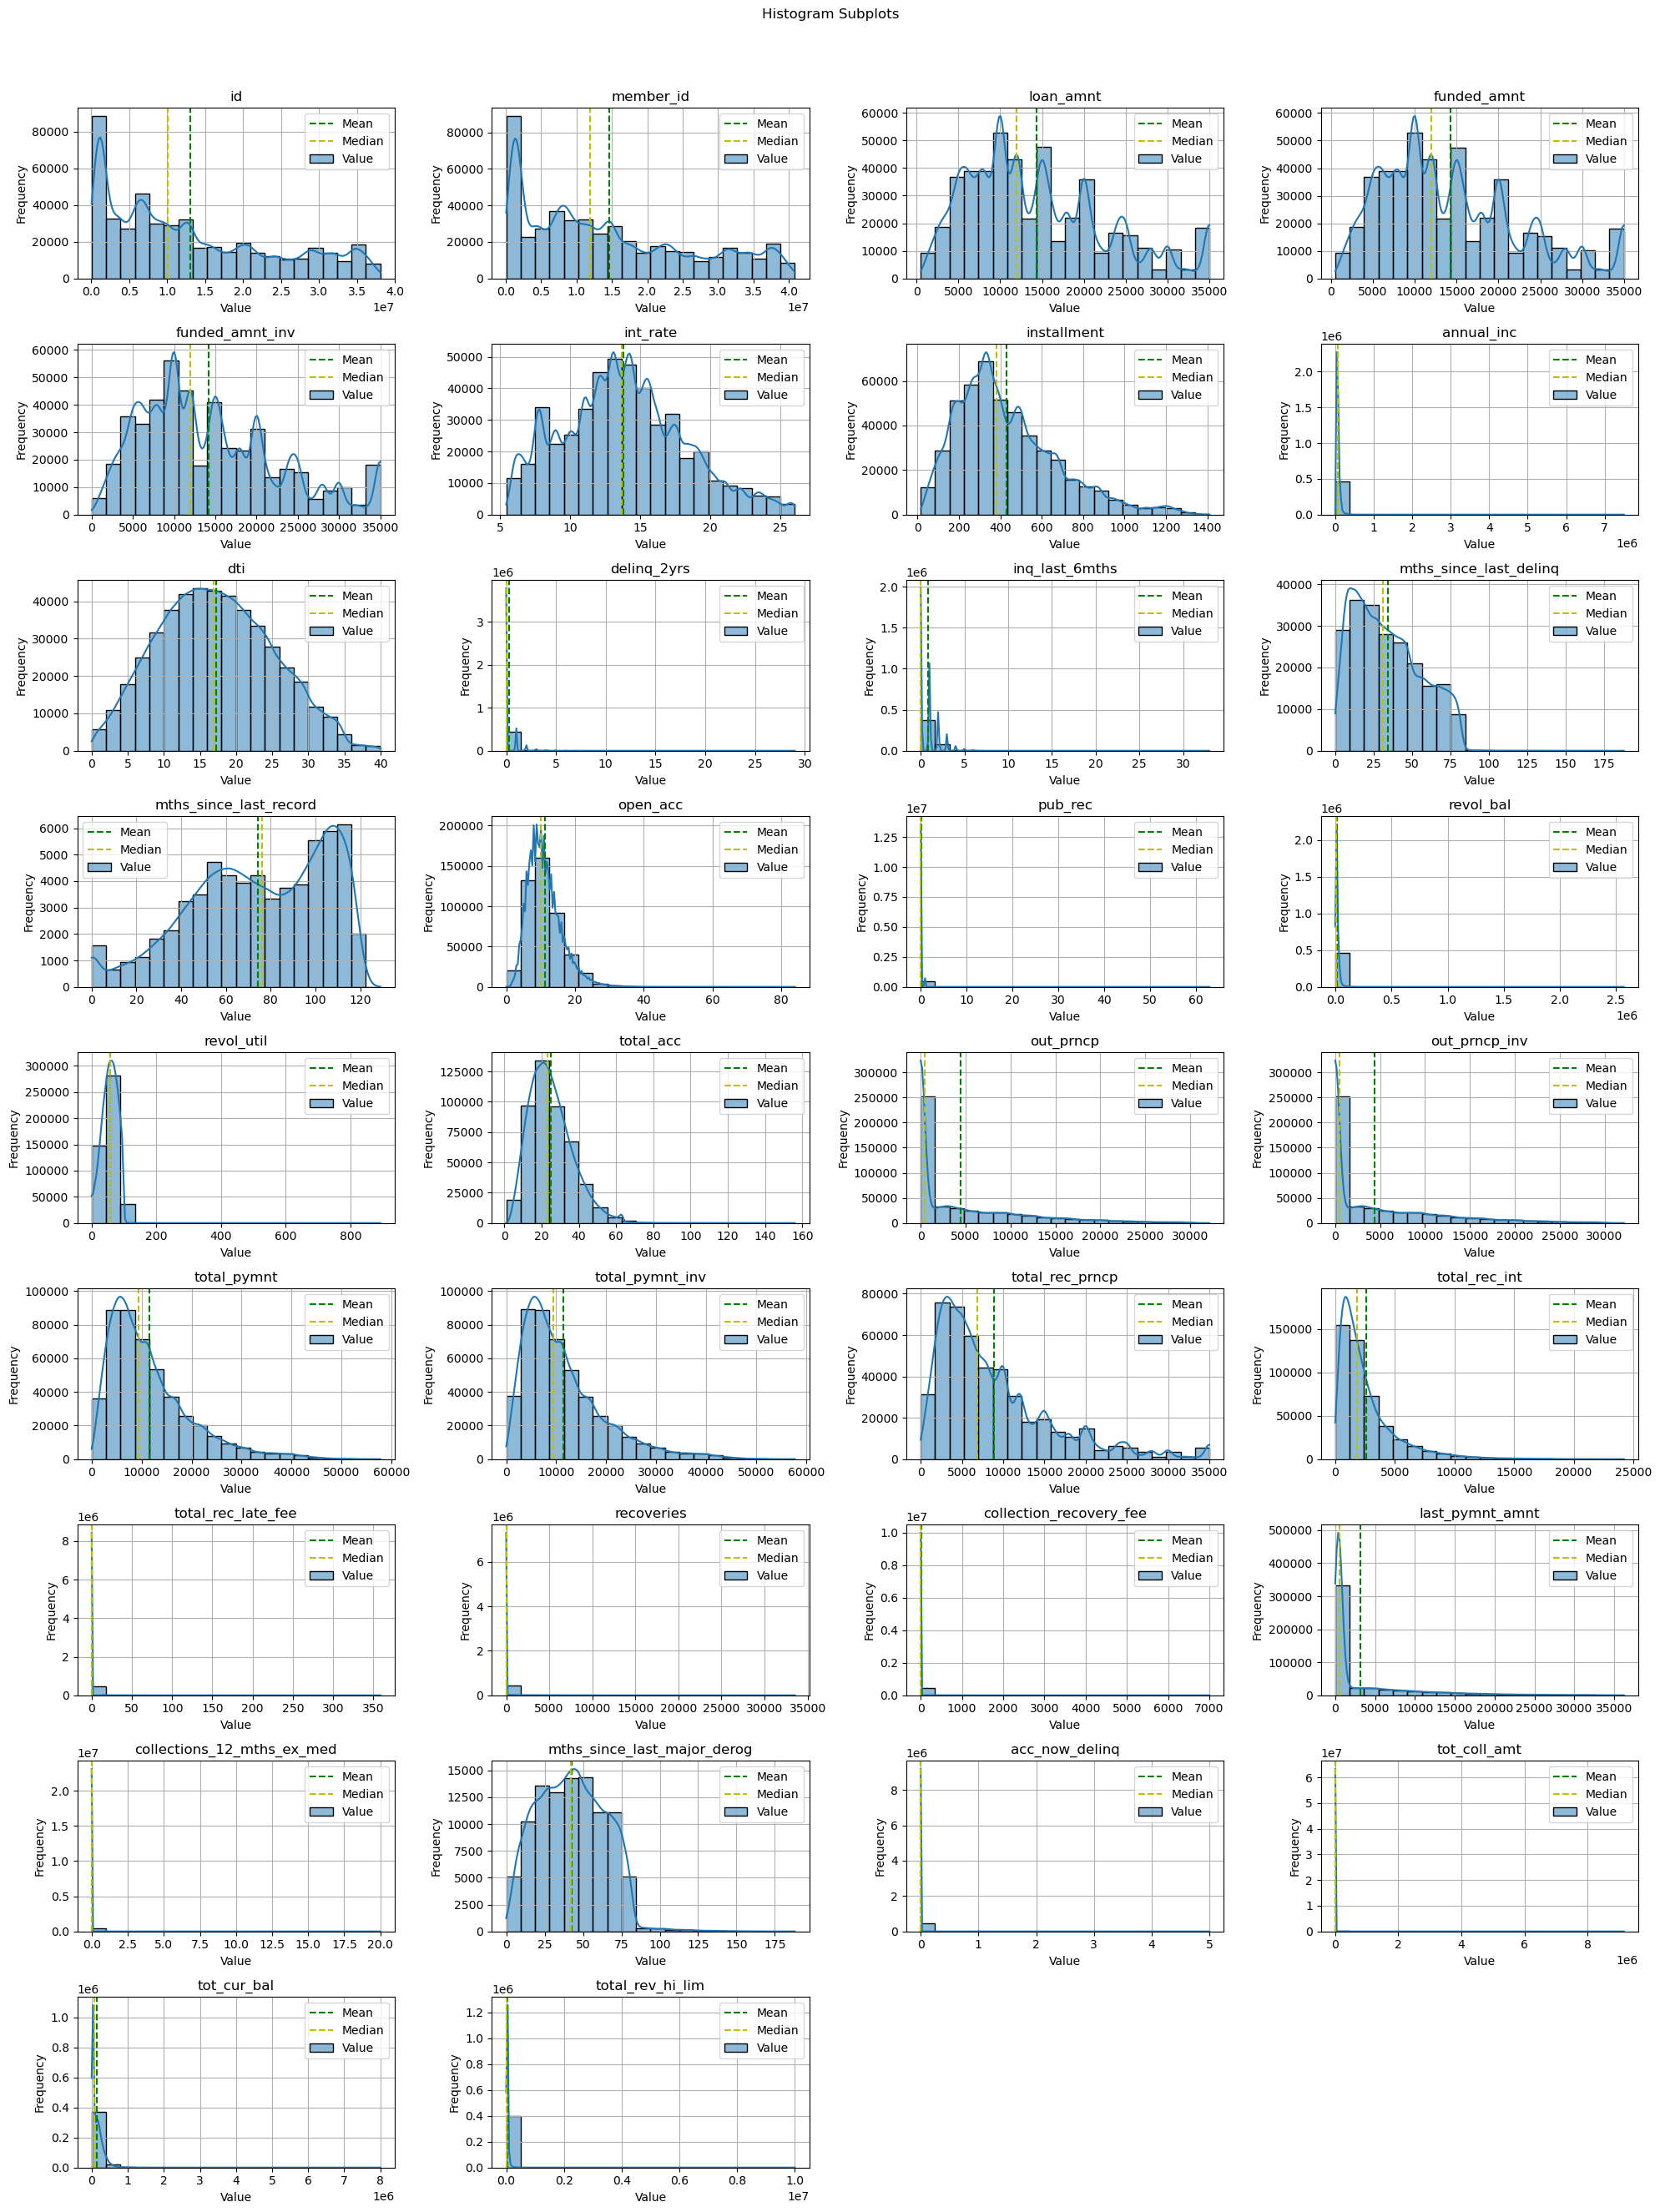

In [11]:
cols = 4
rows = (len(nums) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize = (20, 3 * rows))
fig.suptitle('Histogram Subplots')

for i in range(rows) :
    for j in range(cols) :
        index = i * cols + j
        if index < len(nums) :
            mean_val   = df[nums[index]].mean()
            median_val = df[nums[index]].median()
            
            sns.histplot(df[nums[index]], ax = axes[i, j], bins = 20, kde = True, label = 'Value')
            
            axes[i, j].axvline(x = mean_val, color = 'g', linestyle = 'dashed', label = 'Mean')
            axes[i, j].axvline(x = median_val, color = 'y', linestyle = 'dashed', label = 'Median')

            axes[i, j].set_title(nums[index])
            axes[i, j].set_xlabel('Value')
            axes[i, j].set_ylabel('Frequency')
            axes[i, j].legend()
            axes[i, j].grid(True)
        else :
            axes[i, j].axis('off')

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()

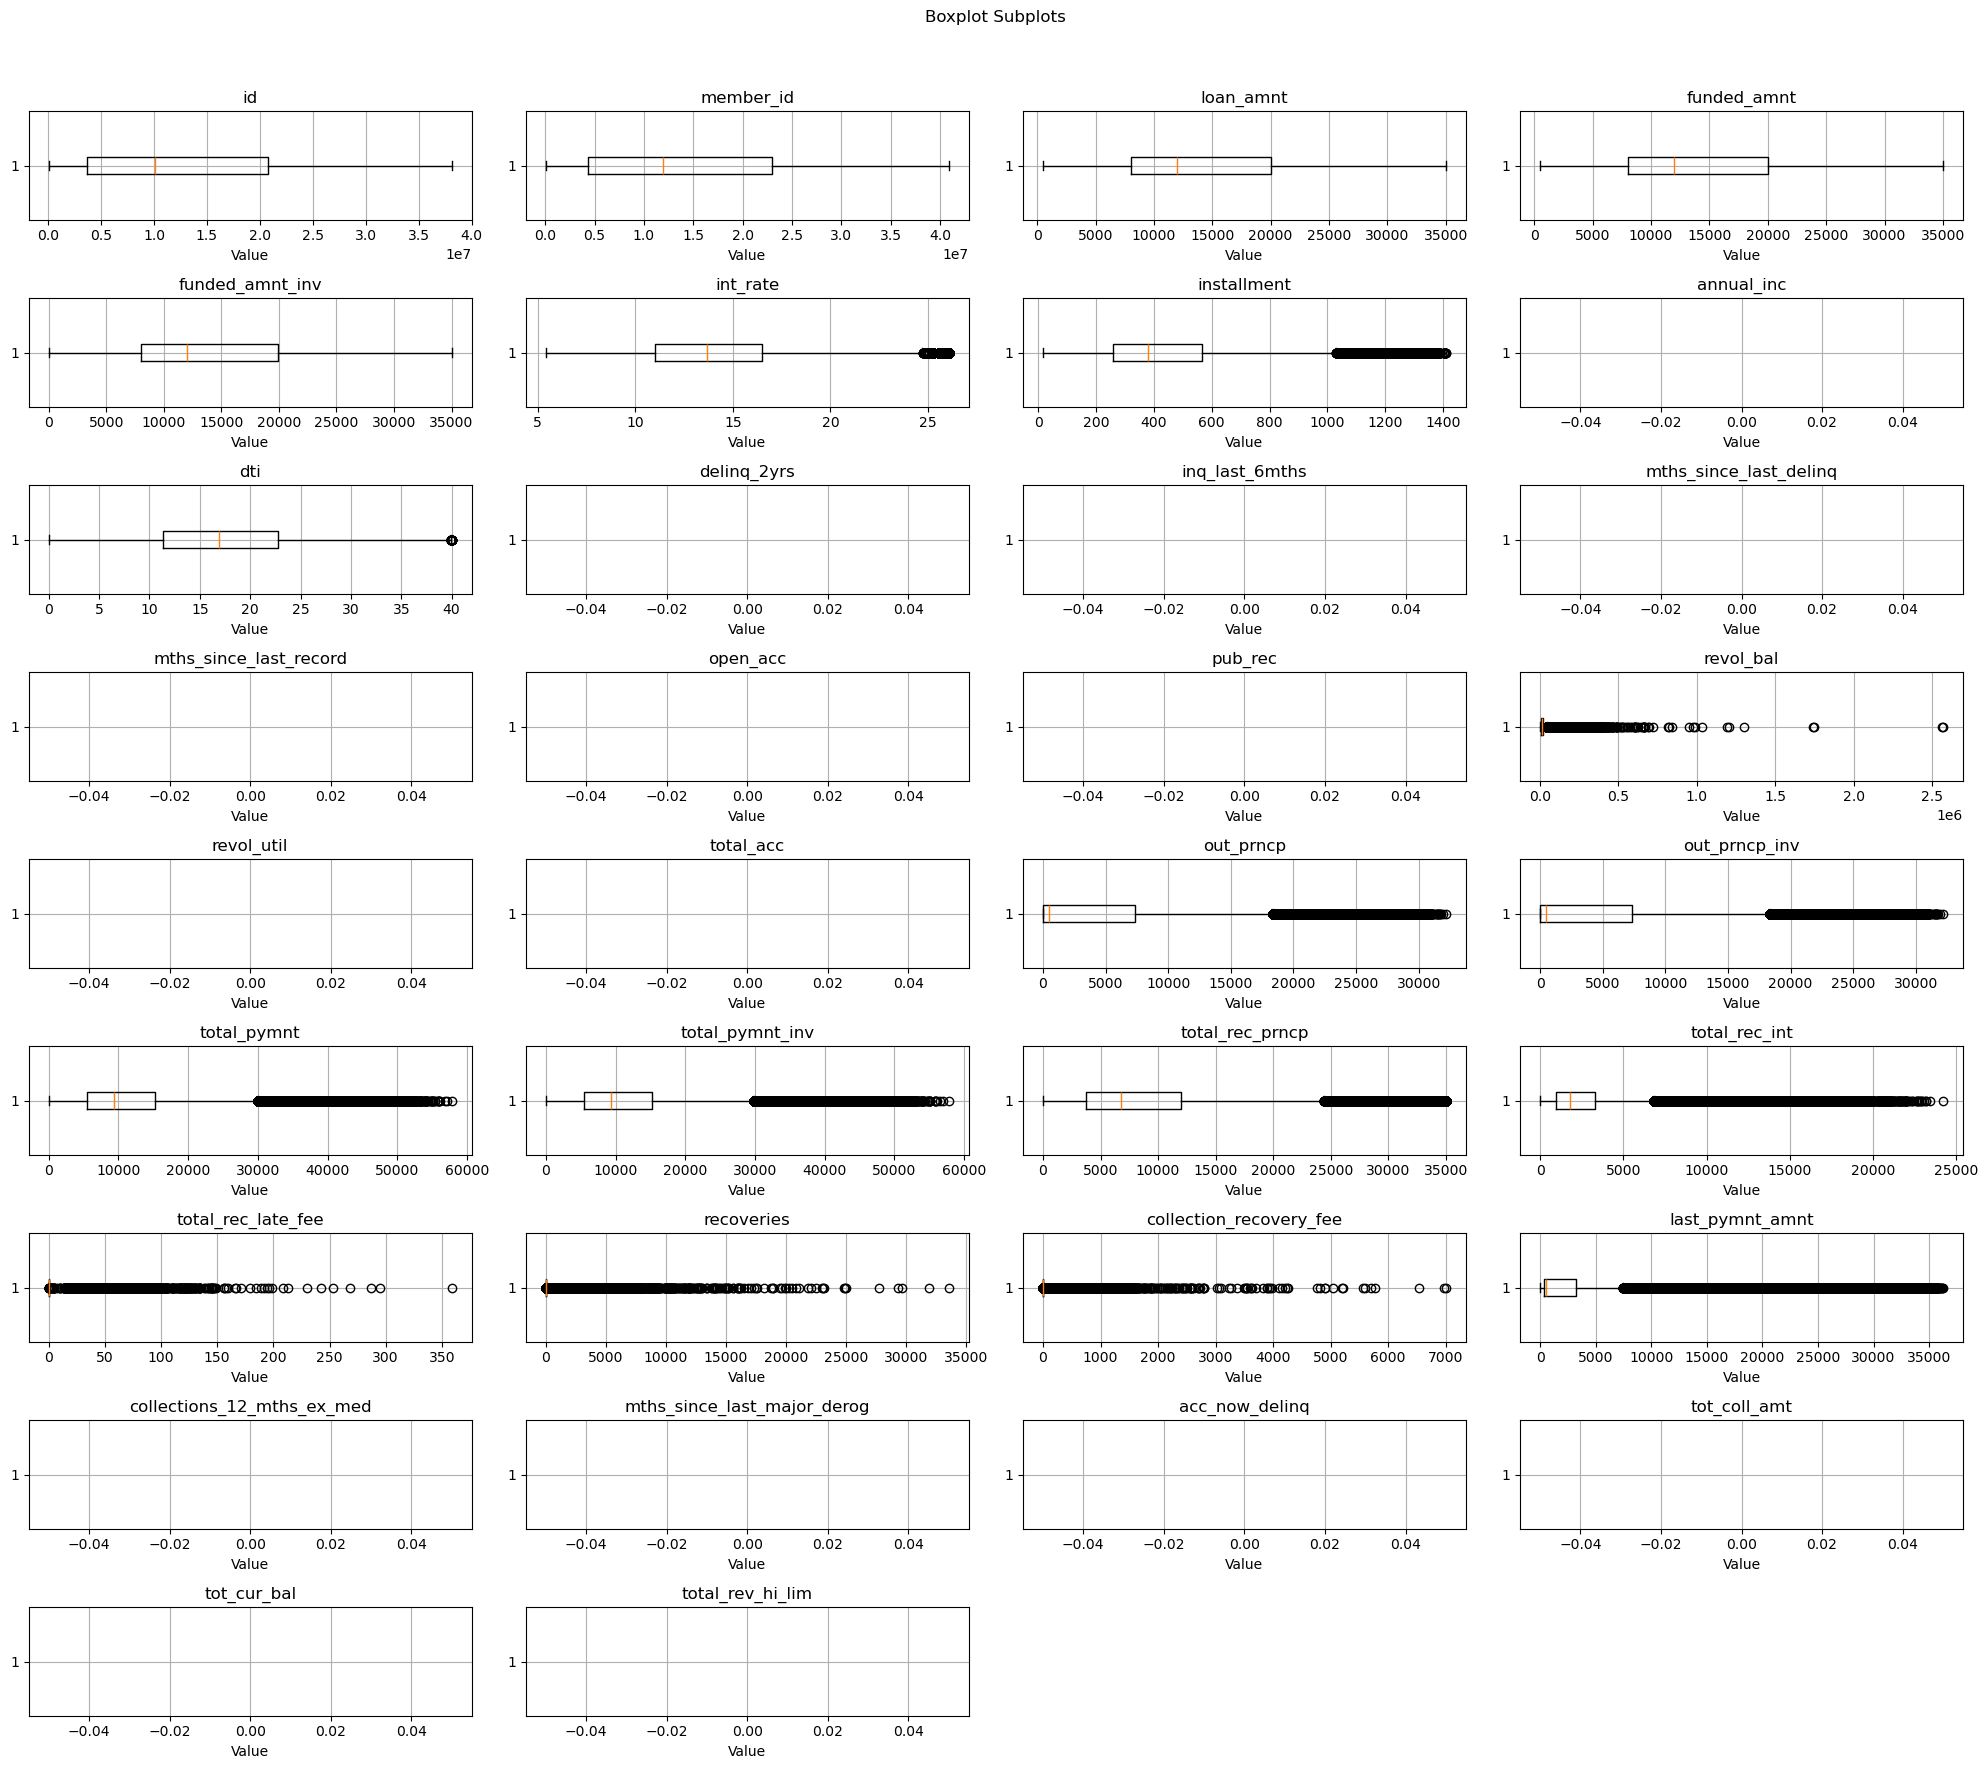

In [12]:
cols = 4
rows = (len(nums) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize = (20, 2 * rows))
fig.suptitle('Boxplot Subplots')

for i in range(rows) :
    for j in range(cols) :
        index = i * cols + j
        if index < len(nums) :
            axes[i, j].boxplot(df[nums[index]], vert = False)
            axes[i, j].set_title(nums[index])
            axes[i, j].set_xlabel('Value')
            axes[i, j].grid(True)
        else:
            axes[i, j].axis('off')

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()

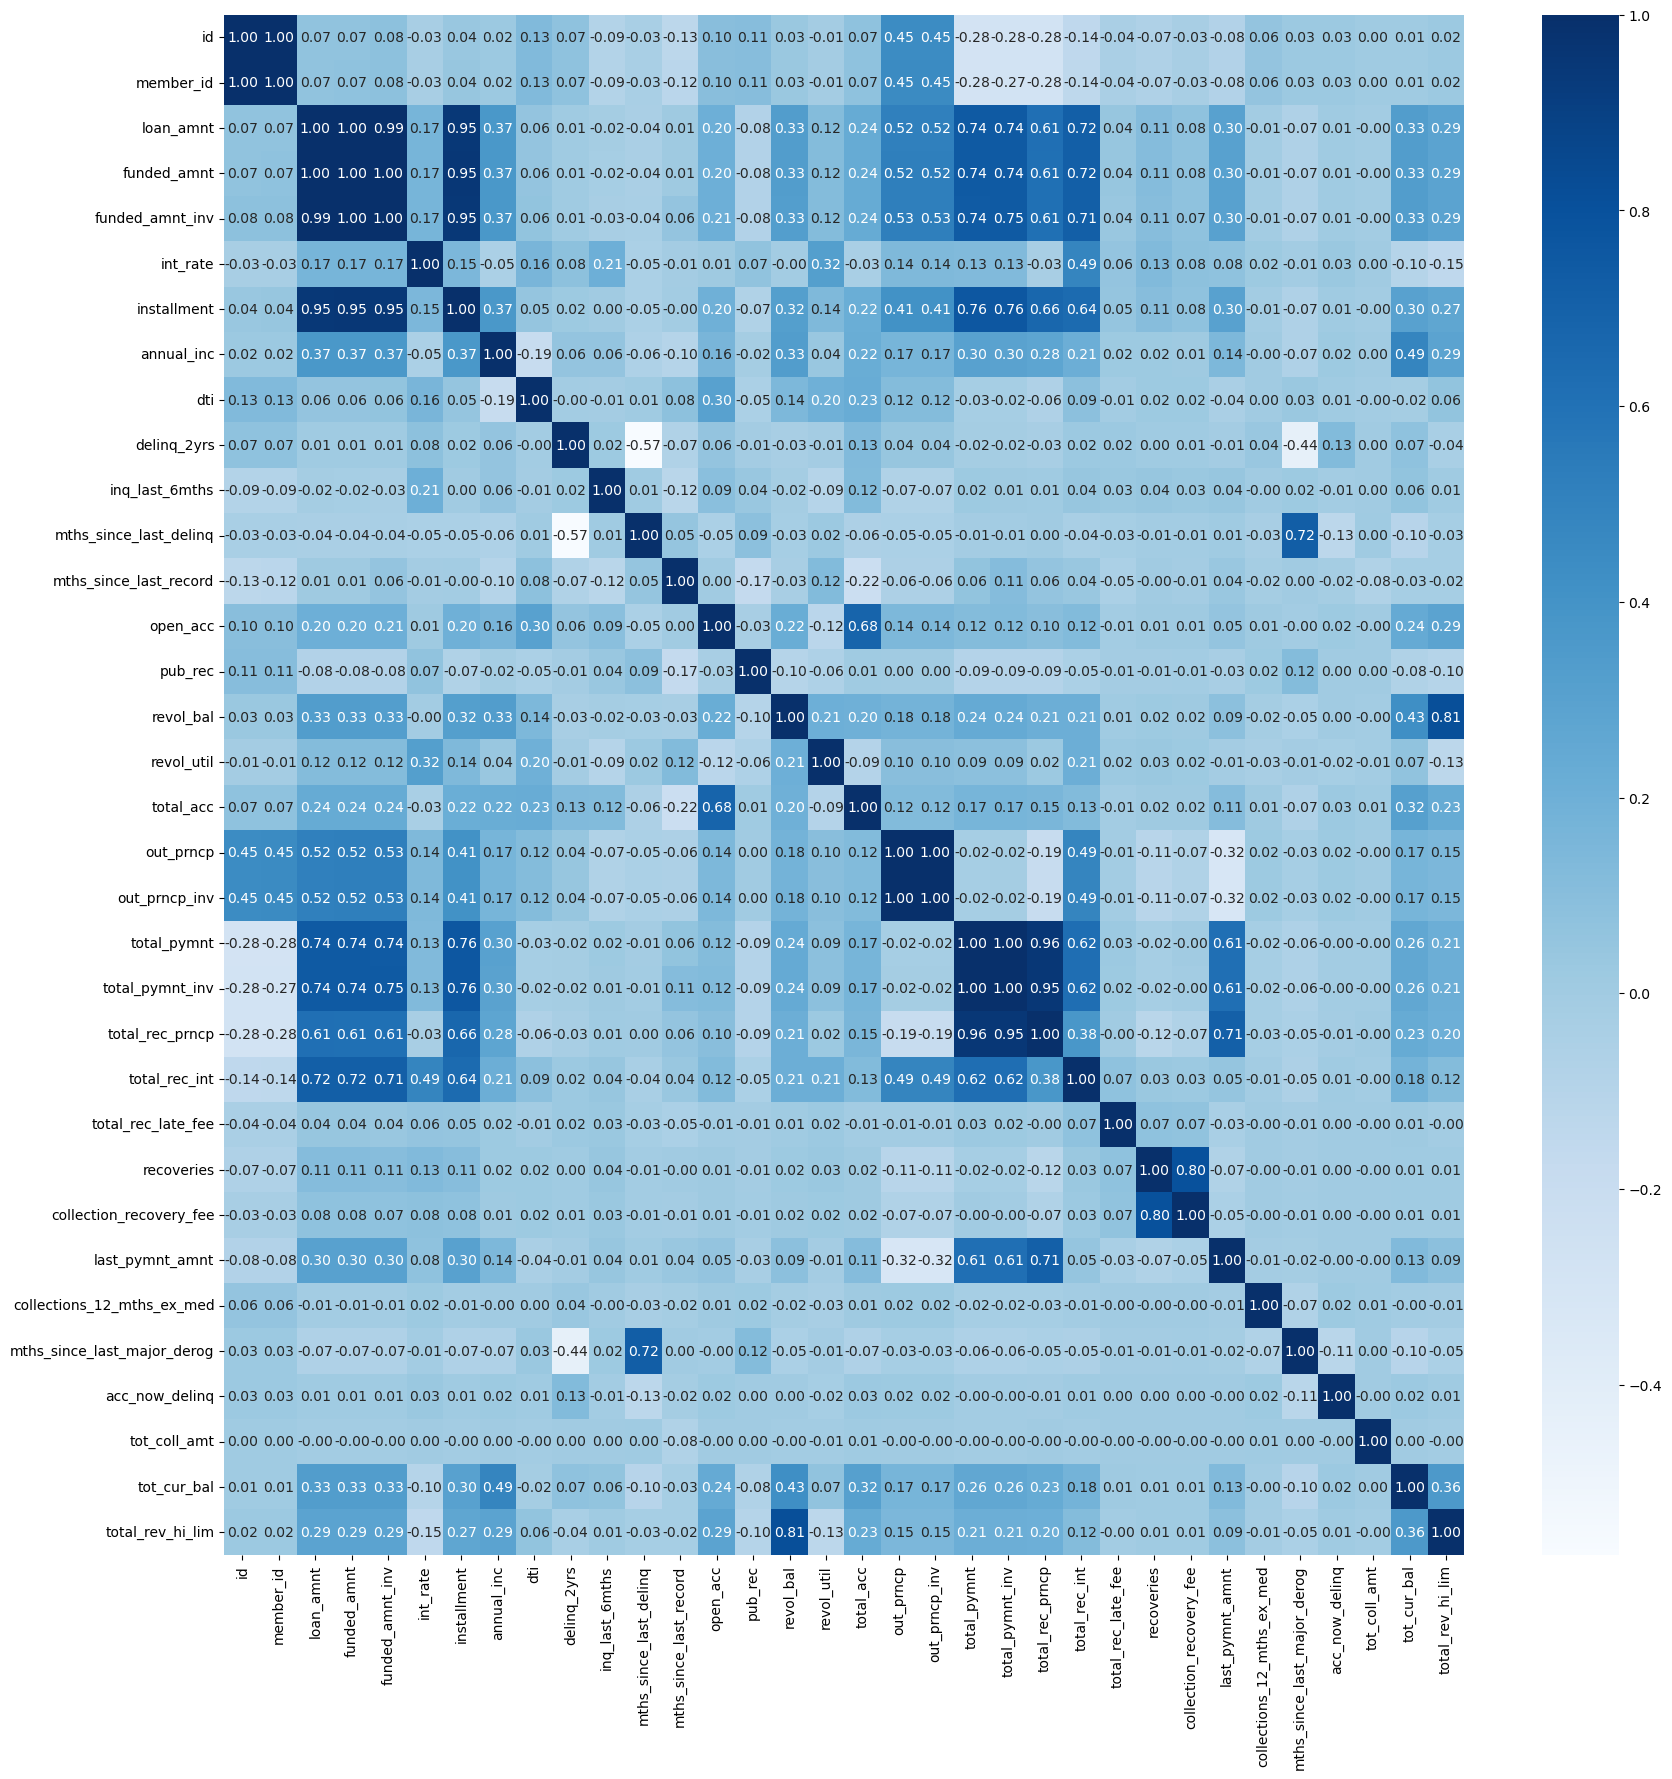

In [13]:
plt.figure(figsize = (20, 20))
sns.heatmap(df[nums].corr(), cmap = 'Blues', annot = True, fmt = '.2f')
plt.show()

### Beberapa analisa dari Univariate dan Multivariate Analysis antara lain :
- Beberapa kolom pada **Histogram** cenderung membentuk *positively skewed* dan juga memiliki *outlier* pada **Scatter Plot**, sehingga penanganannya akan dilakukan *log transformation*.
- Pada **Scatter Plot** yang muncul, ada beberapa kolom yang tidak tampil dikarenakan terdapat *missing values*.
- Pada **Heatmap** yang ditampilkan, terdapat multikolinearitas (nilai di atas 0.70) yang diperlukan menghapus beberapa kolom yang nantinya akan dijadikan *feature selection*.

## Insight Analysis

In [16]:
df_multi1 = df.groupby('term')['loan_amnt'].mean().reset_index()
df_multi1

,term,loan_amnt
0,36 months,12209.018044
1,60 months,19869.225914


In [17]:
df_multi1['loan_amnt'].iloc[1] - df_multi1['loan_amnt'].iloc[0]

7660.207870106284

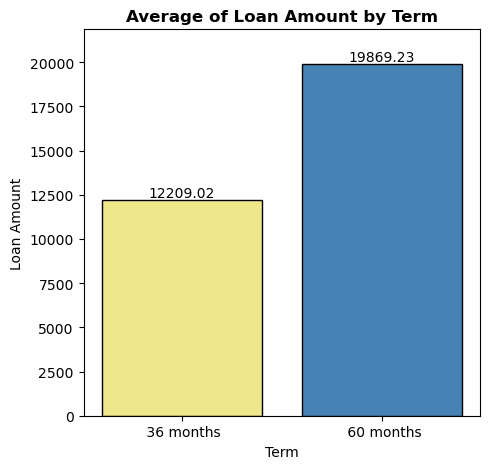

In [71]:
fig, ax = plt.subplots(figsize = (5, 5))

colors = ['khaki', 'steelblue']
bars   = ax.bar(x = 'term', height = 'loan_amnt', data = df_multi1, color = colors, edgecolor = 'black')

ax.set_title('Average of Loan Amount by Term', fontweight = 'bold')
ax.bar_label(bars, fmt = '%.2f')
ax.set_xlabel('Term')
ax.set_ylabel('Loan Amount')
ax.set_ylim(0, max(df_multi1['loan_amnt']) * 1.1)

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.savefig('Average_of_Loan_Amount_by_Term.png')
plt.show()

- Rata-rata nilai pinjaman yang meminjam dengan tenor 60 bulan lebih tinggi daripada tenor 36 bulan.
- Selisih nilai pinjaman antara tenor 36 bulan dengan 60 bulan sebesar 7660.21.

In [89]:
df_multi2          = df.groupby(['grade', 'verification_status'])['member_id'].count().reset_index()
df_multi3          = df.groupby('grade')['member_id'].count().reset_index()
df_multi4          = df_multi2.merge(df_multi3, on = 'grade')
df_multi4.columns  = ['grade', 'verification_status', 'TotalMember', 'TotalMemberAll']
df_multi4['ratio'] = round(df_multi4['TotalMember'] / df_multi4['TotalMemberAll'] * 100, 2)
df_multi4

,grade,verification_status,TotalMember,TotalMemberAll,ratio
0,A,Not Verified,33233,74867,44.39
1,A,Source Verified,22636,74867,30.23
2,A,Verified,18998,74867,25.38
3,B,Not Verified,53583,136929,39.13
4,B,Source Verified,40421,136929,29.52
5,B,Verified,42925,136929,31.35
6,C,Not Verified,35807,125293,28.58
7,C,Source Verified,41781,125293,33.35
8,C,Verified,47705,125293,38.07
9,D,Not Verified,18663,76888,24.27


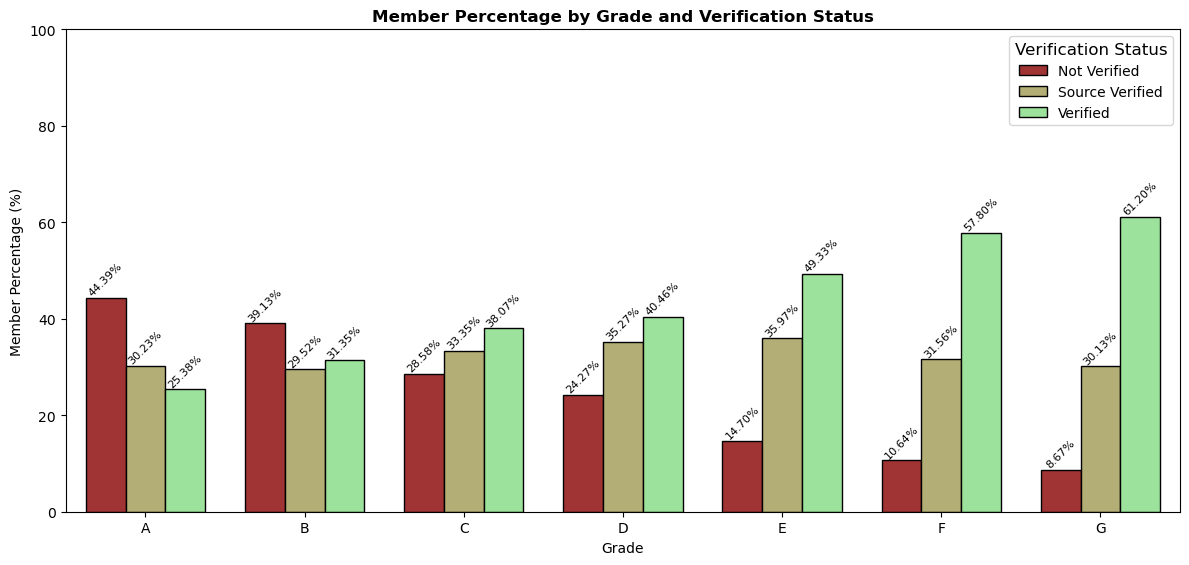

In [221]:
fig, ax = plt.subplots(figsize = (12, 6))

colors = ['firebrick', 'darkkhaki', 'lightgreen']
sns.barplot(x = 'grade', y = 'ratio', data = df_multi4, hue = 'verification_status', palette = colors, edgecolor = 'black', width = 0.75)

ax.set_title('Member Percentage by Grade and Verification Status', fontweight = 'bold')
ax.bar_label(ax.containers[0], fmt = '%.2f%%', fontsize = 8, rotation = 45)
ax.bar_label(ax.containers[1], fmt = '%.2f%%', fontsize = 8, rotation = 45)
ax.bar_label(ax.containers[2], fmt = '%.2f%%', fontsize = 8, rotation = 45)
ax.set_xlabel('Grade')
ax.set_ylabel('Member Percentage (%)')
ax.set_ylim(0, 100)
ax.legend(title = 'Verification Status', title_fontsize = '12', fontsize = '10')

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.savefig('Member_Percentage_by_Grade_and_Verification_Status.png')
plt.show()

- Status Verifikasi *Verified* dimulai dari Grade A sampai G selalu mengalami kenaikan secara persentase.
- Begitu juga untuk Status Verifikasi *Not Verified* selalu menurun dari Grade A hingga G.
- Untuk Status Verifikasi *Source Verified* cenderung stabil dalam persentasenya. 

In [155]:
median_data = df['installment'].median()

def segment(x) :
    if x['installment'] <= median_data :
        segment_result = 'Low'
    elif x['installment'] > median_data :
        segment_result = 'High'
    return segment_result

df['installment_level'] = df.apply(lambda x : segment(x), axis = 1)

In [163]:
df_multi5          = df.groupby(['loan_status', 'installment_level'])['member_id'].count().reset_index()
df_multi6          = df.groupby('loan_status')['member_id'].count().reset_index()
df_multi7          = df_multi5.merge(df_multi6, on = 'loan_status')
df_multi7.columns  = ['loan_status', 'installment_level', 'TotalInstallment', 'TotalInstallmentAll']
df_multi7['ratio'] = round(df_multi7['TotalInstallment'] / df_multi7['TotalInstallmentAll'] * 100, 2)
df_multi7          = df_multi7[~df_multi7['loan_status'].str.contains('Does not meet the credit policy', na = False)]
df_multi7

,loan_status,installment_level,TotalInstallment,TotalInstallmentAll,ratio
0,Charged Off,High,22028,42475,51.86
1,Charged Off,Low,20447,42475,48.14
2,Current,High,118098,224226,52.67
3,Current,Low,106128,224226,47.33
4,Default,High,450,832,54.09
5,Default,Low,382,832,45.91
10,Fully Paid,High,85479,184739,46.27
11,Fully Paid,Low,99260,184739,53.73
12,In Grace Period,High,1860,3146,59.12
13,In Grace Period,Low,1286,3146,40.88


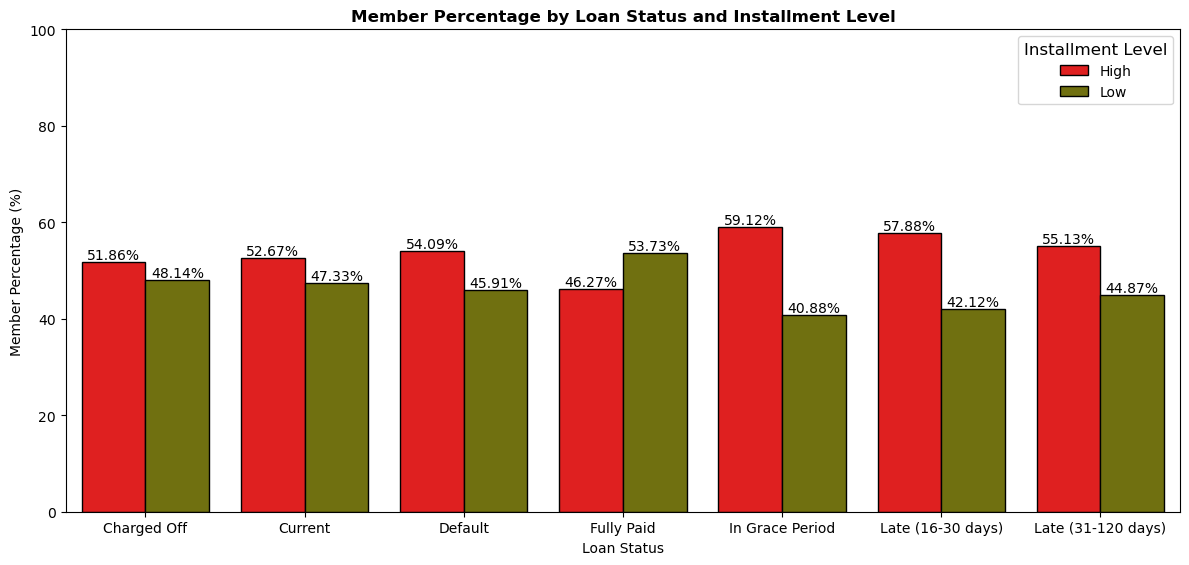

In [227]:
fig, ax = plt.subplots(figsize = (12, 6))

colors = ['red', 'olive']
sns.barplot(x = 'loan_status', y = 'ratio', data = df_multi7, hue = 'installment_level', palette = colors, edgecolor = 'black')

ax.set_title('Member Percentage by Loan Status and Installment Level', fontweight = 'bold')
ax.bar_label(ax.containers[0], fmt = '%.2f%%')
ax.bar_label(ax.containers[1], fmt = '%.2f%%')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Member Percentage (%)')
ax.set_ylim(0, 100)
ax.legend(title = 'Installment Level', title_fontsize = '12', fontsize = '10')

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.savefig('Member_Percentage_by_Loan_Status_and_Installment_Level.png')
plt.show()

- Secara persentase, tidak ada Status Pinjaman yang di bawah 40% dan di atas 60%.
- Hanya Status Pinjaman *Fully Paid* yang Tingkat Pembayaran Pinjaman *Low* lebih tinggi dibandingkan dengan *High*, ini dapat dijadikan tolak ukur untuk penentuan Label.
- Untuk Status Pinjaman lainnya dapat dijadikan kebalikan dari Label untuk *Fully Paid*, namun untuk *Current* perlu dipisahkan dalam kategori Labelnya. 